In [31]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [32]:
#importing the basic libraries

# for mathematical stuff
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


#for setting up the chart size and background
plt.rcParams['figure.figsize']=(14,7)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display


In [33]:
#reading the dataset
data=pd.read_csv('movie_metadata (1).csv')


In [34]:
#to display the shape of the dataset
data.shape

(5043, 28)

In [35]:
#to display all colms in the dataset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [36]:
#we'll now be removing the unnecessary colms. from the dataset
data=data.drop(['director_facebook_likes', 
                'actor_3_facebook_likes',
                'actor_1_facebook_likes',
                'num_voted_users', 
                'cast_total_facebook_likes',
                'facenumber_in_poster',
                'movie_imdb_link',
                'actor_2_facebook_likes',
                'aspect_ratio',
                'content_rating',
                'plot_keywords'
                ],
                 axis=1)
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [37]:
#checking for the missing values colm-wise
data.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
actor_3_name               23
num_user_for_reviews       21
language                   12
country                     5
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [38]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'
data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]

data.isnull().sum()

color                      2
director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [39]:
# The rows for which the sum of Null is less than two are retained
data=data[data.isnull().sum(axis=1)<=2]  #at this step, data is storing values that have missing attributes<=2
data.isnull().sum()

color                     2
director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
actor_3_name              7
num_user_for_reviews      0
language                  3
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [40]:
#imputing missing values
#1. for numerical values, we will take the mean

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

#2. for categorical data, we'll consider the mode
data['color'].fillna(data['color'].mode()[0], inplace = True)

data['language'].fillna(data['language'].mode()[0], inplace = True)

#3. incase actors name is missing, we'll simply replace those missing values with 'Unknown Actor'

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()





0

In [41]:
#now we will be performing Feature Engineering
#Feature engineering is the process of transforming raw data into features that better represent the underlying problem to 
#the predictive models, resulting in improved model accuracy on unseen data

#now we will convert the gross and budget from $ to million$
data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [42]:
#now we'll create a Profit section where Profit = amount earned - amount invested
data['profit'] = data['gross'] - data['budget']

#now if we want to display the names of 10 highest Profit-earning movies
data[['movie_title','profit']].sort_values(by = 'profit', ascending  = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [43]:
#now looking at the prev section, thr are some duplicate values also, so we have to first filter them out.
#no. of rows before removing duplicates
print("No. of rows before removing duplicate values", data.shape[0])

#now removing all the duplicate values
data.drop_duplicates(subset=None, keep='first', inplace=True)

#printing no. of rows aft removing all duplicates
print("No. of rows after removing duplicate values", data.shape[0])

No. of rows before removing duplicate values 3888
No. of rows after removing duplicate values 3789


In [44]:
data[['movie_title','profit']].sort_values(by = 'profit', ascending  = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [45]:
#finding out the no. of movies in each of these languages
data['language'].value_counts()

English       3609
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Dutch            3
Persian          3
Danish           3
Thai             3
Hebrew           3
Aboriginal       2
Indonesian       2
Dari             2
Aramaic          1
Telugu           1
Hungarian        1
Zulu             1
Russian          1
Arabic           1
Bosnian          1
Swedish          1
Czech            1
Filipino         1
Mongolian        1
None             1
Maya             1
Kazakh           1
Vietnamese       1
Romanian         1
Dzongkha         1
Icelandic        1
Name: language, dtype: int64

In [46]:
#from the prev section, we have inferred that majority of these movies are in English language and only few are in other 
#languages, so let's keep only 2 sets of such languages i.e. English and Foreign

def language(x):
    if x=='English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function(language()) on the language column - using apply()
data['language'] = data['language'].apply(language)


#we will check the results now
data['language'].value_counts()

English    3609
Foreign     180
Name: language, dtype: int64

In [47]:
#now we'll categorize the movies as Long/Short based on the duration
def duration(x):
    if x>=120:
        return 'Long'
    else:
        return 'Short'
    
data['duration'] = data['duration'].apply(duration)

data['duration'].value_counts()

Short    2828
Long      961
Name: duration, dtype: int64

In [48]:
#checking values under Genre colms.
data['genres'].value_counts().head(20)

Drama                               152
Comedy|Drama|Romance                149
Comedy|Drama                        147
Comedy                              145
Comedy|Romance                      135
Drama|Romance                       118
Crime|Drama|Thriller                 80
Action|Crime|Thriller                54
Action|Crime|Drama|Thriller          48
Action|Adventure|Sci-Fi              45
Comedy|Crime                         45
Action|Adventure|Thriller            43
Crime|Drama                          42
Drama|Thriller                       41
Horror                               41
Crime|Drama|Mystery|Thriller         40
Action|Adventure|Sci-Fi|Thriller     33
Horror|Thriller                      32
Horror|Mystery|Thriller              31
Biography|Drama                      30
Name: genres, dtype: int64

In [49]:
#let's find out social media popularity of a movie
data['Social_Media_Popularity'] = ( data['num_user_for_reviews']+ data['movie_facebook_likes'] )
# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

   index                          movie_title  Social_Media_Popularity
0     96                        Interstellar                  351725.0
1    296                    Django Unchained                  200193.0
2     10  Batman v Superman: Dawn of Justice                  200018.0
3    128                  Mad Max: Fury Road                  192588.0
4    179                        The Revenant                  191188.0
5     97                           Inception                  177803.0
6     99   The Hobbit: An Unexpected Journey                  167367.0
7      3               The Dark Knight Rises                  166701.0
8   2614                  The Imitation Game                  165608.0
9    278                         The Martian                  154023.0


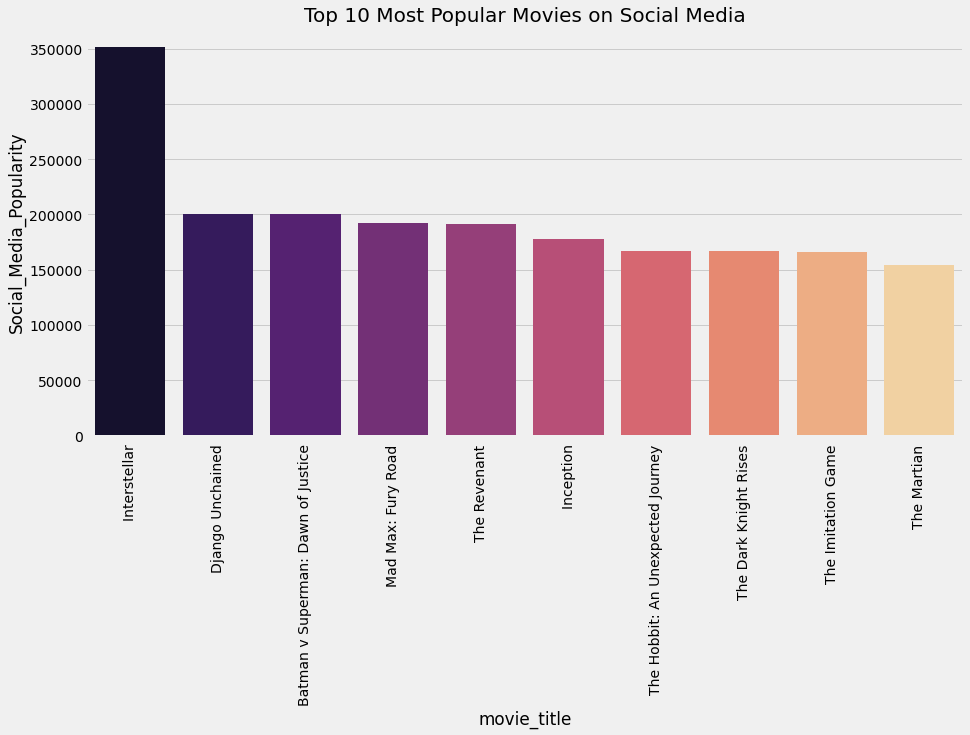

In [50]:
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
#plt.xlabel(' ')
plt.show()

In [51]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# lets check the head of the  data
data[['genres','Genre1']].head(5)



,genres,Genre1
0,Action|Adventure|Fantasy|Sci-Fi,Action
1,Action|Adventure|Fantasy,Action
2,Action|Adventure|Thriller,Action
3,Action|Thriller,Action
5,Action|Adventure|Sci-Fi,Action


In [52]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'copper'))

AttributeError: 'Line2D' object has no property 'colors'

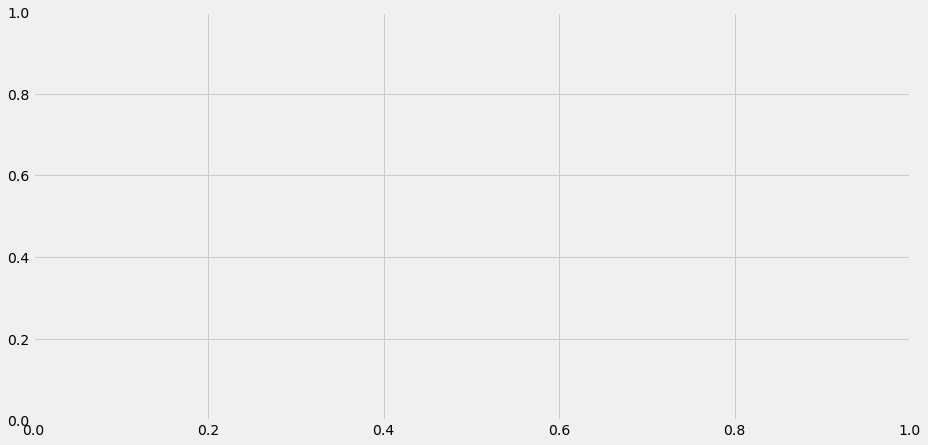

In [58]:
# lets plot these values using lineplot
data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', colors = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
#plt.xlabel(' ',)
plt.show()

In [59]:
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'reds'))

The Most Profitable Movie from each Genre


ValueError: 'reds' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [57]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

Most Profitable Years in Box Office


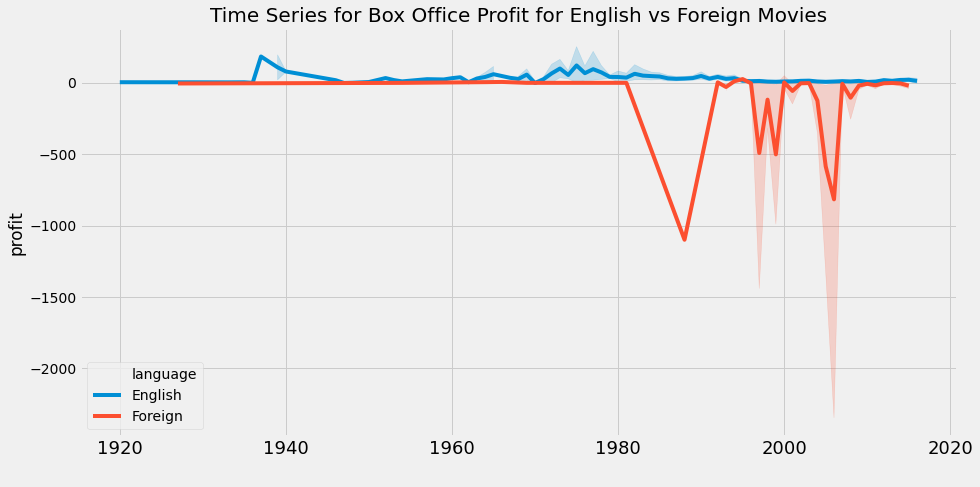

In [56]:
# lets plot them
sns.lineplot(data['title_year'], data['profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()



In [153]:
print("Movies that Made Huge Losses")
display(data[data['profit'] < -2000][['movie_title',
                        'language','profit']].style.background_gradient(cmap = 'Reds'))

display(data['profit'] < -2000)[['profit']].style.background_gradient(cmap = 'Reds')

Movies that Made Huge Losses


,movie_title,language,profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


0       False
1       False
2       False
3       False
5       False
        ...  
5033    False
5034    False
5035    False
5037    False
5042    False
Name: profit, Length: 3789, dtype: bool

TypeError: 'NoneType' object is not subscriptable

In [150]:
print(data['profit'] < -2000)

0       False
1       False
2       False
3       False
5       False
        ...  
5033    False
5034    False
5035    False
5037    False
5042    False
Name: profit, Length: 3789, dtype: bool


In [154]:
display(data['profit'] < -2000)[['profit']].style.background_gradient(cmap = 'Reds')

0       False
1       False
2       False
3       False
5       False
        ...  
5033    False
5034    False
5035    False
5037    False
5042    False
Name: profit, Length: 3789, dtype: bool

TypeError: 'NoneType' object is not subscriptable

,movie_title,duration,gross,profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
3080,E.T. the Extra-Terrestrial,Long,434.949459,424.449459


,movie_title,duration,gross,profit
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870
582,Shrek 2,Short,436.471036,286.471036


Text(0.5, 1.0, 'Gross Comparison')

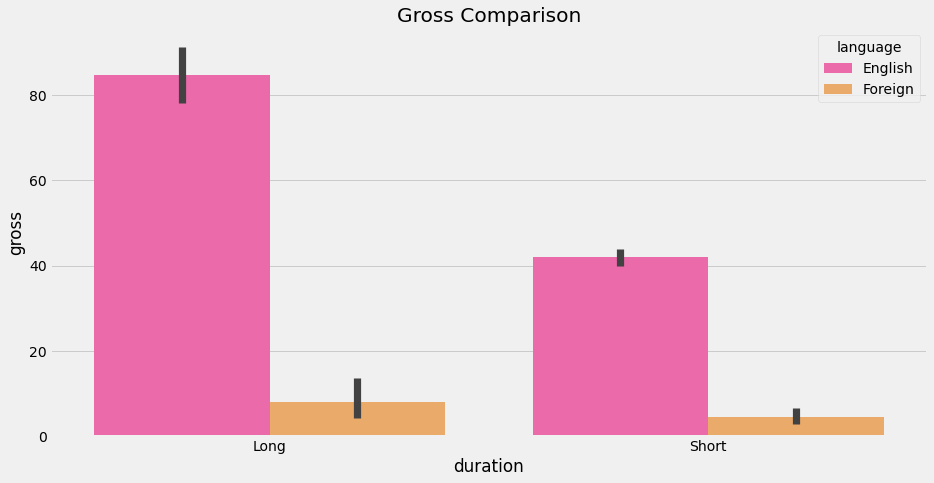

In [156]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'profit']].sort_values(by = 'profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'profit']].sort_values(by = 'profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

Average IMDB Score for Long Duration Movies is 7.05
Average IMDB Score for Short Duration Movies is 6.26

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3175  American History X          8.6


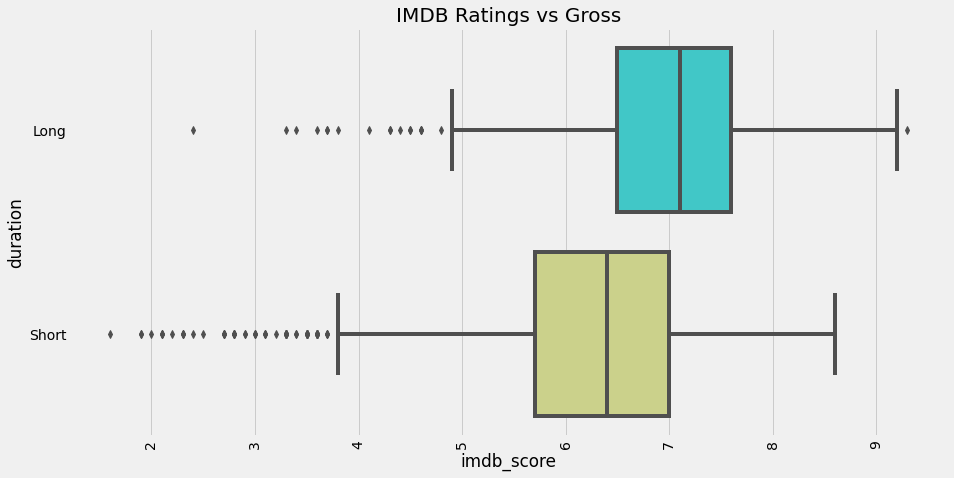

In [158]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette = 'rainbow')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [160]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [161]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [162]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [163]:
# Lets compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


6524

Number of Critics Reviews for Tom Cruise


6353

In [165]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

In [168]:
##Recommending Movies based on Languages
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [169]:
#Recommending Movies Based on Actors

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
940,Interview with the Vampire: The Vampire Chroni...,7.6
1524,A Few Good Men,7.6
736,Collateral,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
930,Jerry Maguire,7.3


In [171]:
## Recommending similar Genres
from mlxtend.preprocessing import TransactionEncoder #Encodes database transaction data in form of a Python list of lists into a NumPy array.

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

ModuleNotFoundError: No module named 'mlxtend'

In [172]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')

genres.head()

ValueError: invalid literal for int() with base 10: 'Interstellar\xa0'

In [173]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

NameError: name 'genres' is not defined

In [174]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

NameError: name 'genres' is not defined

In [175]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)
recommendation_genres('Action')

NameError: name 'genres' is not defined

In [176]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

NameError: name 'genres' is not defined

In [178]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [179]:
# lets test on some results
recommendation_movie('The Expendables')

KeyError: 'The Expendables\xa0'